# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [165]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import matplotlib.pyplot as plt


In [166]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("datasetengineer/logistics-and-supply-chain-dataset")

print(path)

/home/codespace/.cache/kagglehub/datasets/datasetengineer/logistics-and-supply-chain-dataset/versions/1


In [167]:
print(os.listdir(path))
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df.head()

['dynamic_supply_chain_logistics_dataset.csv']


,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


## Dataset Summary

In [168]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  str    
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs               

In [169]:
df.describe()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation
count,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,...,32065.000000,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,32065.000000,32065.000000
mean,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,4.976082e-01,...,6022.001286,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.803656,0.699077,5.177648
std,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,3.532853e-01,...,3427.638017,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.279185,0.324514,4.157988
min,30.000000,-119.999998,5.000000,-1.999993,1.091633e-09,1.322210e-12,0.500000,4.565769e-16,0.000001,4.536949e-09,...,100.002966,-10.000000,7.255415e-19,0.000050,0.500000,4.043927e-09,3.269508e-07,0.000048,0.000003,-1.999998
25%,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,1.440135e-01,...,2822.607616,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.693739,0.456009,1.269197
50%,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,4.961781e-01,...,6785.123209,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.958128,0.839599,6.113662
75%,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,8.498226e-01,...,9374.252913,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.998746,0.982391,9.249206
max,50.000000,-70.000000,19.999875,5.000000,9.999999e+00,9.999993e+02,5.000000,9.999995e-01,1.000000,1.000000e+00,...,10000.000000,39.999886,1.000000e+00,10.000000,5.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,10.000000


## Convert timestamp to datetime

In [170]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['timestamp'].dtype

dtype('<M8[us]')

### Check invalid timestamps:

In [171]:
df['timestamp'].isna().sum()


np.int64(0)

In [172]:
df = df.dropna(subset=['timestamp'])


## Null values check + handle

In [173]:
df.isnull().sum() ##there is no


timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

## No Nulls in dataset

In [174]:
df.duplicated().sum()

np.int64(0)

## No dulplicated data

Since there is no duplicated data or a unique id we dont drop columns

## Mean, Median, and Mode for important logistics metrics

For this dataset, we analyze multiple operational indicators:

Performance:
- lead_time_days
- delivery_time_deviation
- delay_probability

Cost/Operations:
- shipping_costs
- fuel_consumption_rate
- customs_clearance_time

Risk signals:
- traffic_congestion_level
- disruption_likelihood_score

In [175]:
key_metrics = [
    'lead_time_days',
    'delivery_time_deviation',
    'delay_probability',
    'shipping_costs',
    'fuel_consumption_rate',
    'customs_clearance_time',
    'traffic_congestion_level',
    'disruption_likelihood_score'
]

for col in key_metrics:
    print(f"\n=== {col} ===")
    print("Mean:  ", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:  ", df[col].mode().iloc[0])



=== lead_time_days ===
Mean:   5.227502056448464
Median: 3.2976536222606923
Mode:   1.0

=== delivery_time_deviation ===
Mean:   5.177648068922157
Median: 6.1136617982342045
Mode:   -1.9999979891152304

=== delay_probability ===
Mean:   0.6990768456604328
Median: 0.8395986077324338
Mode:   3.12874583791758e-06

=== shipping_costs ===
Mean:   459.3744517974708
Median: 388.99691118908765
Mode:   100.00000000270798

=== fuel_consumption_rate ===
Mean:   8.011734983479823
Median: 5.636035817632568
Mode:   5.0

=== customs_clearance_time ===
Mean:   2.2964477942816313
Median: 1.9382733484967636
Mode:   0.5000000010386003

=== traffic_congestion_level ===
Mean:   4.9914932089194375
Median: 4.981244166033586
Mode:   1.0916326575415083e-09

=== disruption_likelihood_score ===
Mean:   0.803655566979687
Median: 0.9581281097212876
Mode:   1.0


Check for outliers

In [176]:
for col in key_metrics:
    print(f"\n--- Outliers for {col} ---")
    print("Smallest:")
    print(df.sort_values(col)[['timestamp', col]].head(3))
    print("\nLargest:")
    print(df.sort_values(col, ascending=False)[['timestamp', col]].head(3))



--- Outliers for lead_time_days ---
Smallest:
                timestamp  lead_time_days
20289 2023-04-26 09:00:00             1.0
10385 2022-03-09 17:00:00             1.0
2923  2021-05-02 19:00:00             1.0

Largest:
                timestamp  lead_time_days
6450  2021-09-26 18:00:00       14.999995
15986 2022-10-29 02:00:00       14.999976
19514 2023-03-25 02:00:00       14.999957

--- Outliers for delivery_time_deviation ---
Smallest:
                timestamp  delivery_time_deviation
1452  2021-03-02 12:00:00                -1.999998
20636 2023-05-10 20:00:00                -1.999996
31167 2024-07-22 15:00:00                -1.999996

Largest:
                timestamp  delivery_time_deviation
17325 2022-12-23 21:00:00                     10.0
25440 2023-11-27 00:00:00                     10.0
17147 2022-12-16 11:00:00                     10.0

--- Outliers for delay_probability ---
Smallest:
                timestamp  delay_probability
10467 2022-03-13 03:00:00           0.

## Encode the categorical variable: risk_classification

The dataset contains one categorical column:
- risk_classification (High Risk / Moderate Risk / Low Risk)

We one-hot encode it and keep the original column for readability and plotting.


In [177]:
# One-hot encode
risk_dummies = pd.get_dummies(df['risk_classification'], prefix='risk')
df = pd.concat([df, risk_dummies], axis=1)

# Convert True/False → 1/0
df = df.replace({True: 1, False: 0})

#df = df.drop(columns=['risk_classification'])


In [178]:

df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation,risk_High Risk,risk_Low Risk,risk_Moderate Risk
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682,0,0,1
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281,1,0,0
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594,1,0,0
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897,1,0,0
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484,1,0,0


In [179]:
df['risk_classification'].value_counts()

risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

There is class imbalance with the risk clasification seeing high risk the 75%

## Conclusions

### 1. Are the data usable?

Yes, the dataset is highly usable.

- It contains over 30,000 observations and 26 variables.
- There are no missing values.
- There are no duplicate rows.
- Most columns are numeric and already suitable for analysis.

This makes the dataset well-prepared for modeling and further analysi

---

### 2. Do you need to modify or correct the data?

Only minor preparation steps were needed:

- Converted `timestamp` to datetime format.
- One-hot encoded the categorical column `risk_classification`.

Some values may appear negative (for example in temperature or delivery deviation), but these are realistic and not errors:
- Negative delivery deviation can mean early delivery.
- Negative temperature values are expected.

Overall, the dataset is clean and does not require major correction.

---

### 3. Is there any class imbalance?

Yes, there is class imbalance in the categorical variable:

- `risk_classification`

High Risk        23944

Moderate Risk     5011

Low Risk          3110



# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

## Trend over time

We plot monthly average delivery_time_deviation over time to evaluate delivery performance.


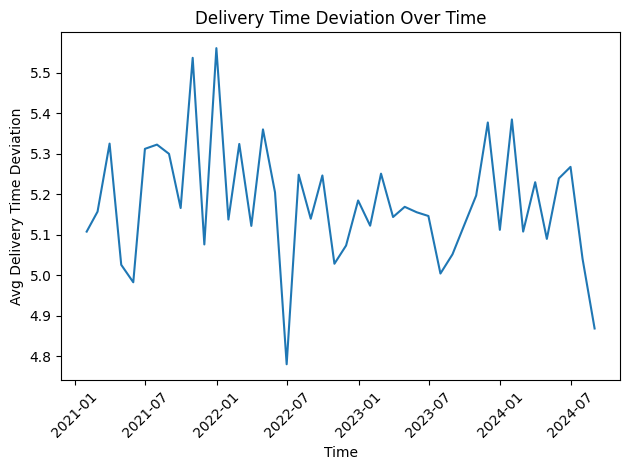

In [161]:
df_month = df.set_index('timestamp').resample('ME').mean(numeric_only=True)

plt.figure()
plt.plot(df_month.index, df_month['delivery_time_deviation'])
plt.title("Delivery Time Deviation Over Time")
plt.xlabel("Time")
plt.ylabel("Avg Delivery Time Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Risk signals over time

We compare delay_probability and disruption_likelihood_score to see if they move together.


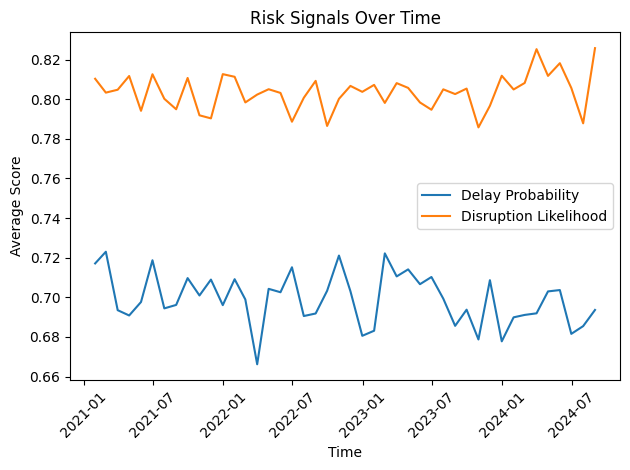

In [162]:
plt.figure()
plt.plot(df_month.index, df_month['delay_probability'], label="Delay Probability")
plt.plot(df_month.index, df_month['disruption_likelihood_score'], label="Disruption Likelihood")
plt.title("Risk Signals Over Time")
plt.xlabel("Time")
plt.ylabel("Average Score")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Storytelling With Data Graph 3 — Compare groups (bar chart)

We compare average lead_time_days across risk classifications.

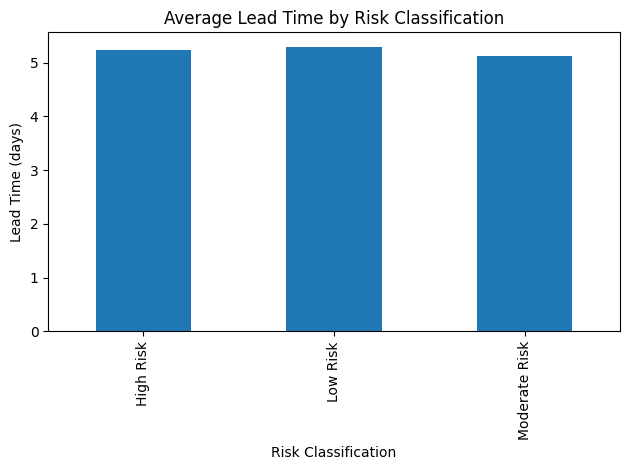

In [163]:
lead_by_risk = df.groupby('risk_classification')['lead_time_days'].mean()

plt.figure()
lead_by_risk.plot(kind='bar')
plt.title("Average Lead Time by Risk Classification")
plt.xlabel("Risk Classification")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()


## Potential driver: traffic vs costs

We compare shipping_costs with traffic_congestion_level over time to tell a potential cause/effect story.


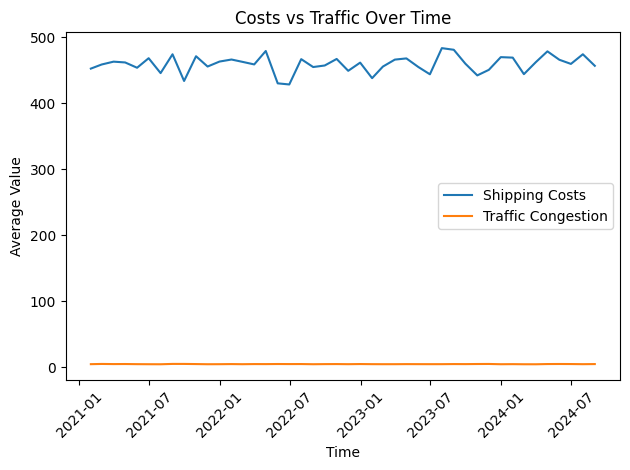

In [164]:
plt.figure()
plt.plot(df_month.index, df_month['shipping_costs'], label="Shipping Costs")
plt.plot(df_month.index, df_month['traffic_congestion_level'], label="Traffic Congestion")
plt.title("Costs vs Traffic Over Time")
plt.xlabel("Time")
plt.ylabel("Average Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
